# Kaggle Titanic

data dictionary
|Column|Desc   |Value      |
|------|-------|-----------|
|survival|survival| 0 = No, 1 = Yes  |
|pclass| Ticket Class|1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex|Gender|   |
|Age|Age in years|   |
|sibsp| # of siblings/spouses aboard| |
|parch| # of parents/children aboard| |
|ticket| ticket number| |
|fare| passenger fare| |
|cabin| cabin number| |
|embarked| port of embarkation| |

In [29]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
import pandas_profiling
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from pandas_profiling import ProfileReport

# Import Warnings
import warnings
warnings.simplefilter(action="ignore")

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
train_df = pd.read_csv('./titanicData/train.csv', header=0, index_col=False)
train_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df = pd.read_csv('./titanicData/test.csv', header=0)
test_df.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [5]:
gender_df = pd.read_csv('./titanicData/gender_submission.csv', header=0)
gender_df.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

# Data Exploration

In [17]:
train_df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [32]:
profile = ProfileReport(train_df, title='Pandas Profiling Report')
train_df.profile_report()

Render HTML: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


In [25]:
# look at the num and cat columns separately
df_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
df_cat = train_df[['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked']]

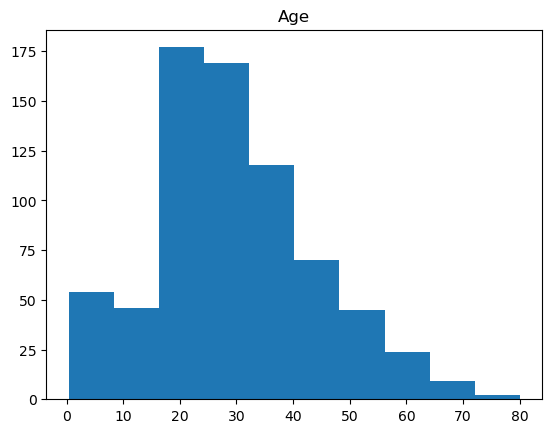

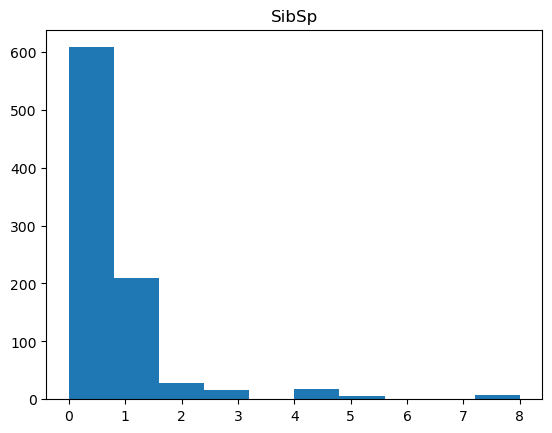

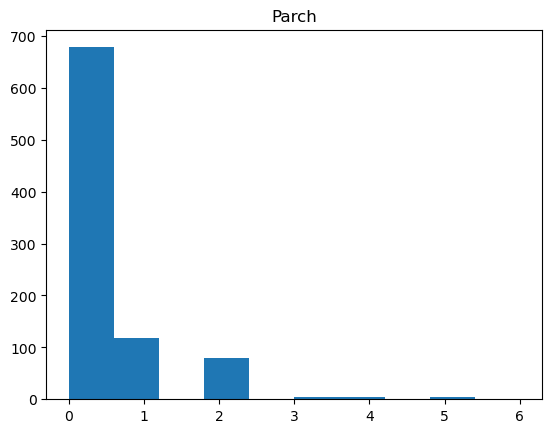

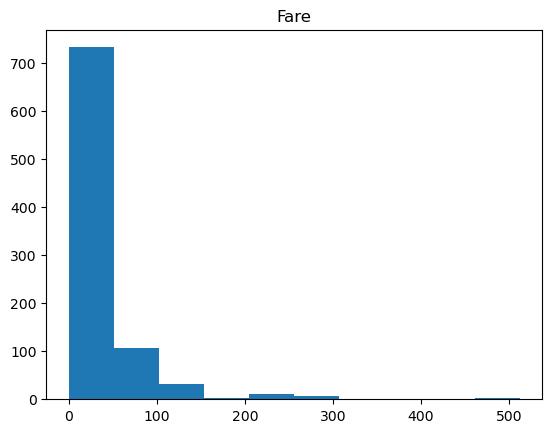

In [30]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

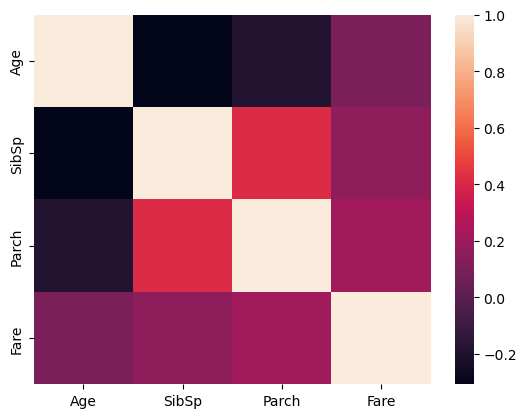

In [35]:
print(df_num.corr())
sns.heatmap(df_num.corr())

In [43]:
df_cat['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

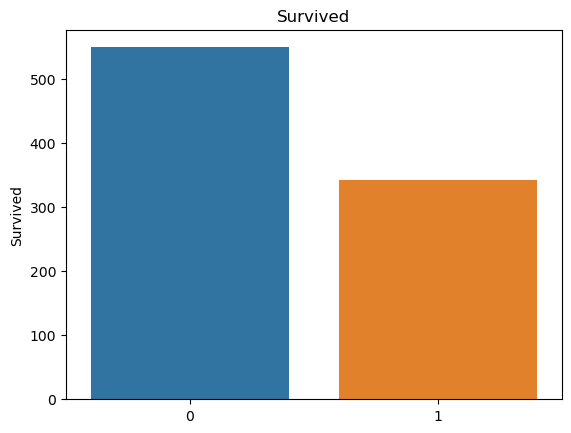

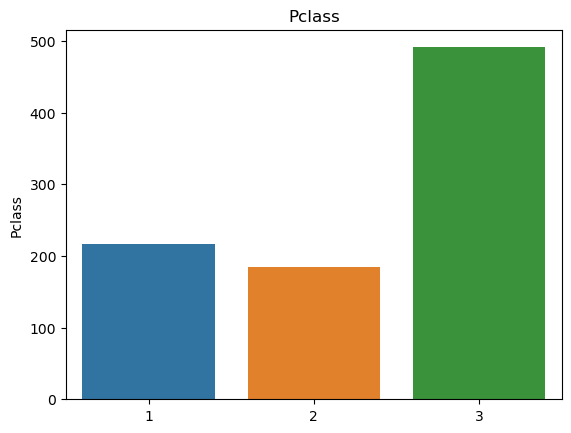

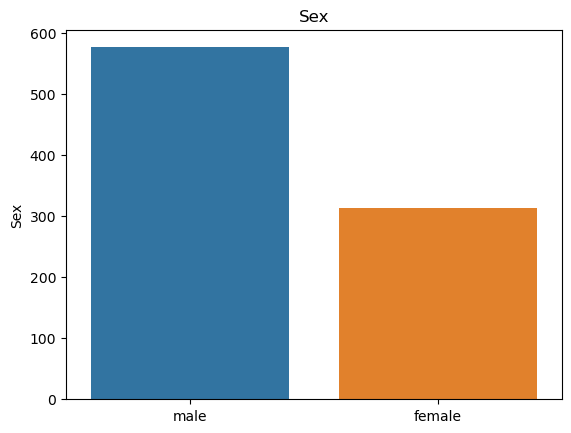

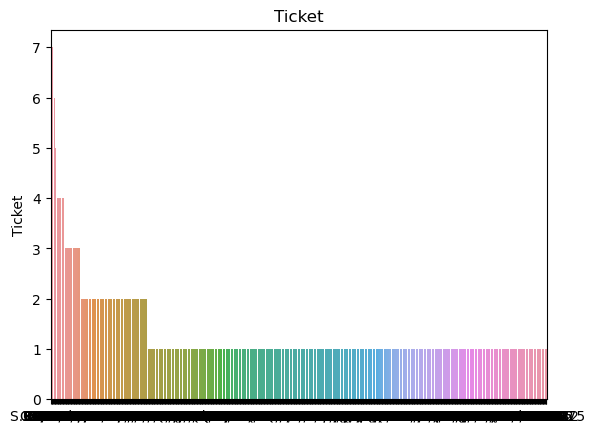

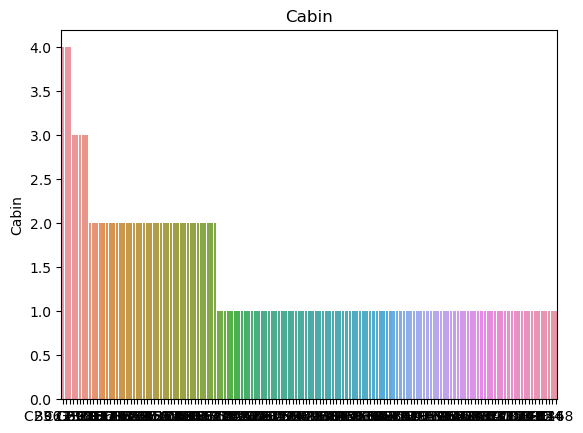

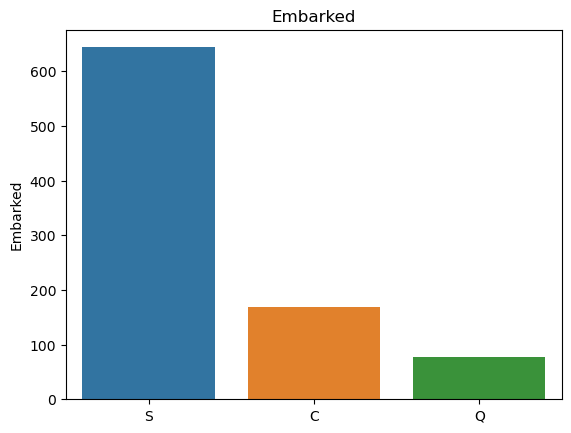

In [48]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, y=df_cat[i].value_counts()).set_title(i)
    plt.show()

In [49]:
# Comparing survival and each of the categorical values
pd.pivot_table(train_df, index='Survived', columns='Pclass', values='Ticket', aggfunc='count')

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

In [50]:
pd.pivot_table(train_df, index='Survived', columns='Sex', values='Ticket', aggfunc='count')

Sex       female  male
Survived              
0             81   468
1            233   109

In [51]:
pd.pivot_table(train_df, index='Survived', columns='Embarked', values='Ticket', aggfunc='count')

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

In [53]:
df_cat.Cabin.head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

In [54]:
# Feature engineering on cabin
train_df['cabin_multiple'] = train_df.Cabin.apply(lambda x : 0 if pd.isna(x) else len(x.split(' ')))
train_df['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [55]:
pd.pivot_table(train_df, index='Survived', columns='cabin_multiple', values='Ticket', aggfunc='count')

cabin_multiple      0      1    2    3    4
Survived                                   
0               481.0   58.0  7.0  3.0  NaN
1               206.0  122.0  9.0  3.0  2.0

In [6]:
# check women survival rate
women = train_df.loc[train_df.Sex == 'female']['Survived']
women.head()
# train_df[train_df['Sex'] == 'female']

1    1
2    1
3    1
8    1
9    1
Name: Survived, dtype: int64

In [7]:
rate_women = sum(women) / len(women)

print('% of women who survived: ', rate_women)

% of women who survived:  0.7420382165605095


In [8]:
men = train_df.loc[train_df.Sex == 'male']['Survived']
men.head()

0    0
4    0
5    0
6    0
7    0
Name: Survived, dtype: int64

In [9]:
rate_men = sum(men) / len(men)
print('% of men who survived: ', rate_men)

% of men who survived:  0.18890814558058924


The comparison above show that Sex or gender is an important feature in survival predictions.</br>
Women has a 74% chance of survival while men only has a meagre 18.89%

## How about passenger class?
Does passenger class is an important factor in determining survival rate?

In [10]:
train_df.groupby(by=['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [11]:
print('Survival rate of 1st class passenger: %.5f' % (136 / (80+136)))
print('Survival rate of 2nd class passenger: %.5f' % (87 / (97+87)))
print('Survival rate of 3rd class passenger: %.5f' % (119 / (372+119)))

Survival rate of 1st class passenger: 0.62963
Survival rate of 2nd class passenger: 0.47283
Survival rate of 3rd class passenger: 0.24236


1st class passengers have the highest survival rate

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

y = train_df['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_df.PassengerId, 'Survived': predictions})
output.to_csv('./titanicData/randomForest.csv', index=False)
print('Successfully saved!')

Successfully saved!


In [13]:
output.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1